In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
import numpy as np



# -----------------------------
# 1) 데이터 준비
# -----------------------------


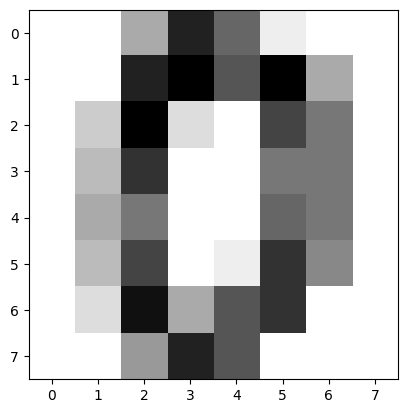

In [2]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------


import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')


In [3]:
# 이미지 평탄화

n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))


In [4]:
# 훈련과 테스트 데이터 분리


X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)


In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((1437, 64), (360, 64), (1437,), (360,))

In [11]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  
    metrics=["accuracy"]
)



In [12]:
# -----------------------------
# 3) 모델 학습
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2541 - loss: 3.7724 - val_accuracy: 0.5104 - val_loss: 1.4362
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5448 - loss: 1.4053 - val_accuracy: 0.8125 - val_loss: 0.6916
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.7346 - loss: 0.8325 - val_accuracy: 0.8889 - val_loss: 0.4020
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.7824 - loss: 0.6498 - val_accuracy: 0.9306 - val_loss: 0.2677
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8207 - loss: 0.5006 - val_accuracy: 0.9549 - val_loss: 0.1916
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.8607 - loss: 0.4240 - val_accuracy: 0.9618 - val_loss: 0.1578
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8842 - loss: 0.3525 - val_accuracy: 0.9757 - val_loss: 0.1191
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8947 - loss: 0.3171 - val_accuracy: 0.96

In [17]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------

y_pred = model.predict(X_test)

y_pred_class = np.argmax(y_pred, axis=1)     # (N,)
y_test_class = y_test  # (N,)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step


In [18]:
# 학습 곡선

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

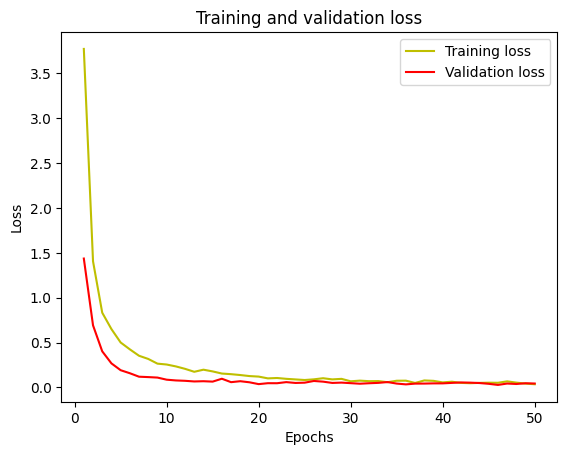

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

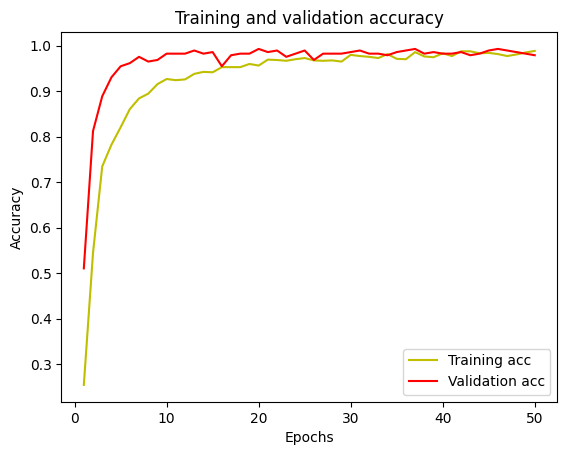

In [21]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [22]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      0.92      0.93        37
           2       1.00      1.00      1.00        34
           3       0.95      1.00      0.97        37
           4       0.92      1.00      0.96        34
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        35
           7       1.00      0.95      0.98        43
           8       0.91      0.91      0.91        32
           9       0.97      1.00      0.99        38

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[31  0  0  0  2  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  2  1]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  1  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0